Read and Explore Data

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np # linear algebra

df = pd.read_csv('../data/heart_failure_data.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.shape

(299, 13)

In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Exploratory Data Analysis

In [6]:
#import required ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#let us check the Target variable
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'Target feature - DEATH_EVENT')

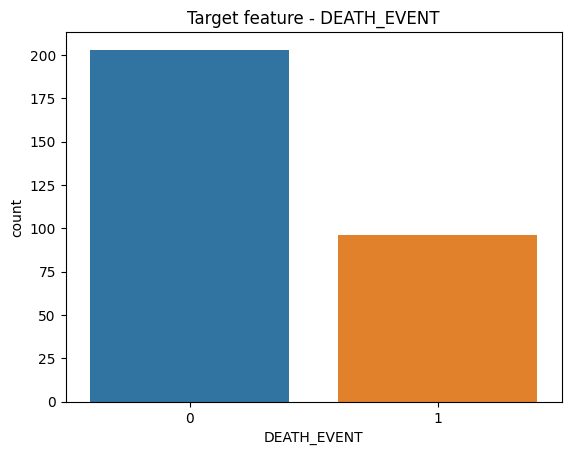

In [8]:
sns.countplot(x=df['DEATH_EVENT'])
plt.title('Target feature - DEATH_EVENT')

In [9]:
df.drop(labels=['creatinine_phosphokinase'], axis=1, inplace= True)
X=df.drop(labels=['DEATH_EVENT'], axis=1)

y=df['DEATH_EVENT']

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

Standardize the Independent Variable

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
X_scale[:10]

array([[ 1.12241562, -0.76951729, -0.7334022 , -1.40148726,  1.54380482,
         0.04261981,  0.3450794 , -1.42497837,  0.81482171, -0.60580803,
        -1.41050035],
       [-0.57381747, -0.76951729, -0.7334022 ,  0.13382512, -0.64775028,
         0.02525659, -0.38206497, -0.06263641,  0.81482171, -0.60580803,
        -1.38442636],
       [ 0.27429907, -0.76951729, -0.7334022 , -1.40148726, -0.64775028,
        -1.04656683, -0.20027888, -1.65203537,  0.81482171,  1.65068793,
        -1.37138936],
       [-0.99787575,  1.29951596, -0.7334022 , -1.40148726, -0.64775028,
        -0.5389847 ,  0.3450794 ,  0.16442058,  0.81482171, -0.60580803,
        -1.37138936],
       [ 0.27429907,  1.29951596,  1.36350832, -1.40148726, -0.64775028,
         0.69824672,  1.07222376, -4.60377628, -1.22726234, -0.60580803,
        -1.35835236],
       [ 2.39459044,  1.29951596, -0.7334022 ,  0.30441539,  1.54380482,
        -0.60243247,  0.52686549, -0.97086439,  0.81482171,  1.65068793,
        -1.358

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
log_reg.score(X_test,y_test)

0.8524590163934426

In [15]:
y_pred=log_reg.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        61
           1       0.86      0.84      0.85        61

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85      0.85       122



<AxesSubplot:>

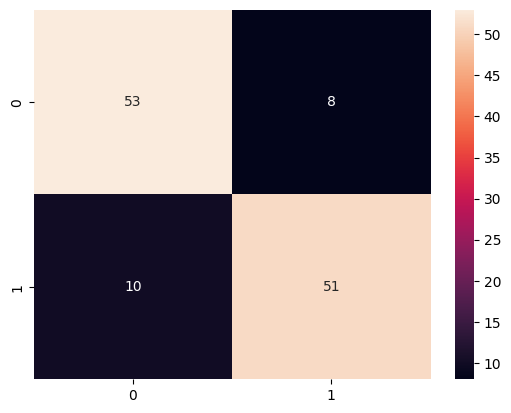

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Support Vector Machine - Classification

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [22]:
model.score(X_test,y_test)

0.8852459016393442

In [23]:
svc_predict=model.predict(X_test)

In [24]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        61
           1       0.86      0.92      0.89        61

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122



<AxesSubplot:>

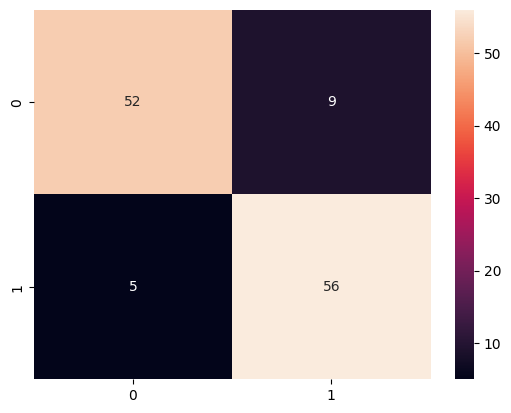

In [25]:
sns.heatmap(confusion_matrix(y_test,svc_predict,), annot=True)